In [158]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
np.set_printoptions(suppress=True)

In [39]:
# Прочитаем данные.
df = pd.read_csv('stat.csv', encoding='cp1251', names=['sick_leaves', 'age', 'gender'], skiprows=[0])

### Посмотрим на данные

In [40]:
df.head()

,sick_leaves,age,gender
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [41]:
df.shape

(237, 3)

Всего 237 измерений.

In [124]:
df['sick_leaves'].value_counts()

3    54
4    48
2    47
1    30
5    20
6    14
7    10
0     9
8     5
Name: sick_leaves, dtype: int64

Сотрудники болели от 0 до 8 дней.

(array([  9.,  30.,  47.,  54.,  48.,  20.,  14.,  10.,   5.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

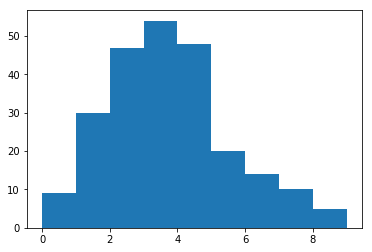

In [136]:
plt.hist(df['sick_leaves'], bins = list(range(10)))

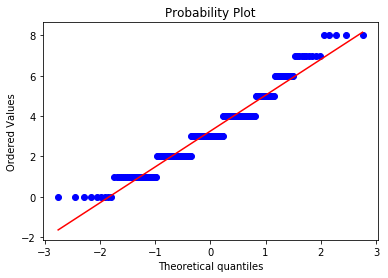

In [137]:
stats.probplot(df['sick_leaves'], dist="norm", plot=pylab)
pylab.show()

Как показала гистограмма и QQ-plot, распределение количества дней на больничном примерно нормальное. Мы не знаем как были получены данные из файла, но предположим, что их выбирали случайным образом
Посмотрим на распределение количества дней на больничном среди следующих групп сотрудников: "мужчины", "женщины",
"старше 35", "35 и малдше". 

(array([  8.,  16.,  31.,  31.,  25.,  12.,   5.,   7.,   4.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

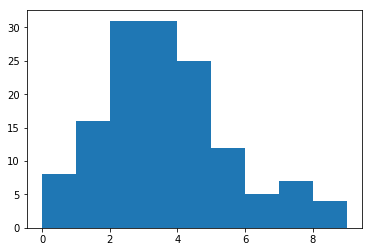

In [131]:
plt.hist(df[df['gender'] =='М']['sick_leaves'], bins = list(range(10)))

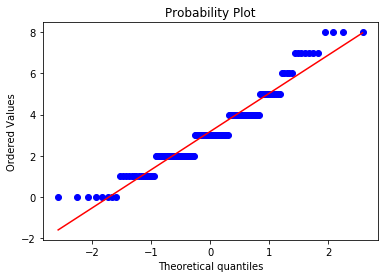

In [74]:
stats.probplot(df[df['gender'] == 'М']['sick_leaves'], dist="norm", plot=pylab)
pylab.show()

(array([  1.,  14.,  16.,  23.,  23.,   8.,   9.,   3.,   1.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

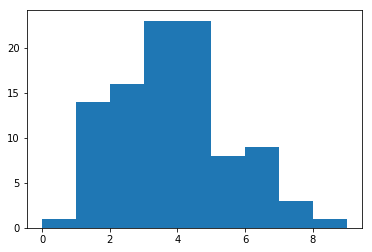

In [132]:
plt.hist(df[df['gender'] =='Ж']['sick_leaves'], bins = list(range(10)))

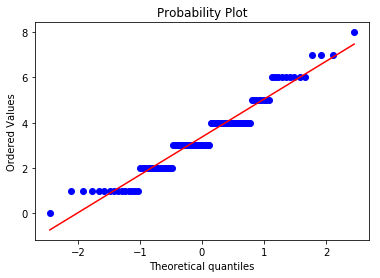

In [72]:
stats.probplot(df[df['gender'] == 'Ж']['sick_leaves'], dist="norm", plot=pylab)
pylab.show()

(array([  7.,  23.,  35.,  44.,  34.,  15.,  12.,   7.,   3.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

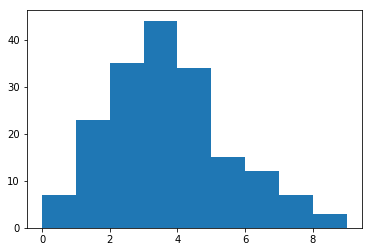

In [129]:
plt.hist(df[df['age'] > 35]['sick_leaves'], bins = list(range(10)))

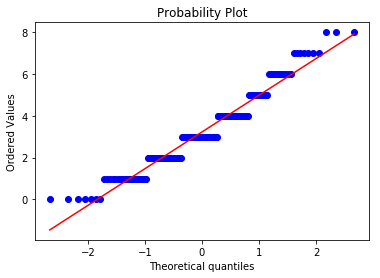

In [77]:
stats.probplot(df[df['age'] > 35]['sick_leaves'], dist="norm", plot=pylab)
pylab.show()

(array([  2.,   7.,  12.,  10.,  14.,   5.,   2.,   3.,   2.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

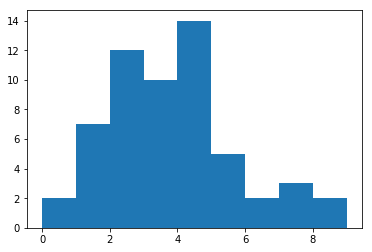

In [130]:
plt.hist(df[df['age'] <= 35]['sick_leaves'], bins = list(range(10)))

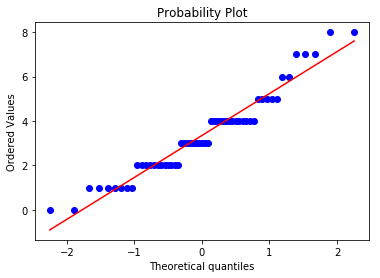

In [65]:
stats.probplot(df[df['age'] <= 35]['sick_leaves'], dist="norm", plot=pylab)
pylab.show()

Посчитаем сколько всего было сотрудников, которые болели более 2х дней

In [139]:
n_more_2 = df[df['sick_leaves'] > 2]['sick_leaves'].count()
n_more_2

151

Посмотрим сколько среди болевших более 2х дней было женщин

In [141]:
women_n = df[(df['gender'] == 'Ж') & (df['sick_leaves'] > 2)]['sick_leaves'].count()
women_n

67

Посчитаем пропорцию женщин среди всех, кто болел более 2х дней

In [143]:
women_prop = women_n / n_more_2
women_prop

0.44370860927152317

Посмотрим сколько среди болевших более 2х дней было мужчин

In [116]:
men_n = df[(df['gender'] == 'М') & (df['sick_leaves'] > 2)]['sick_leaves'].count()

Посчитаем пропорцию женщин среди всех, кто болел более 2х дней

In [118]:
men_prop = men_n / n_more_2
men_prop

0.55629139072847678

Докажем, что мужчины болеют статичтически значимо чаще женщин.

$H_0$: Пропорции мужчин и женщин одинаковы среди тех кто болел более 2х дней ($p_м = p_ж$).

$H_A$: Пропорция мужчин больше пропопрции женщин среди тех кто болел более 2х дней ($p_м > p_ж$)

Выберем в качестве уровня значимости p-value = 0.05

Посчитаем Z-score $z=\frac{p_м-p_ж}{\sqrt{\frac{p_ж p_ж}{n}}}$

In [147]:
z_women_men = (men_prop - women_prop) / np.sqrt(women_prop * (1 - women_prop)/ n_more_2)
z_women_men

2.7845841747551967

In [151]:
stats.t.sf(z_women_men, n_more_2-1)

0.0030254264641709971

Для полученного Z-score p-value = 0.003, что позволяет отвергнуть $H_0$ в пользу $H_A$.

Чтобы доказать, что более молодые сотрудники болеют реже старших коллег возпользуемся методом, который мы уже использовали выше.

Посчитаем сколько было тех, кому 35 или менее лет среди тех, кто болел более 2х дней.

In [100]:
young_n = df[(df['age'] <= 35) & (df['sick_leaves'] > 2)]['sick_leaves'].count()

Посчитаем пропорцию тех, кому 35 или менее лет среди тех, кто болел более 2х дней

In [106]:
young_prop = young_n / n_more_2
young_prop

0.23841059602649006

Посчитаем сколько было тех, кто старше 35 лет среди тех, кто болел более 2х дней.

In [103]:
old_n = df[(df['age'] > 35) & (df['sick_leaves'] > 2)]['sick_leaves'].count()

Посчитаем пропорцию тех, кто старше 35 среди тех, кто болел более 2х дней

In [107]:
old_prop = old_n / n_more_2
old_prop

0.76158940397350994

Докажем, что те, кто старше 35 лет болеют статичтически значимо чаще тех, кому 35 и меньше.

$H_0$: Пропорции тех, кто старше 35 и тех, кому 35 и менее лет, одинаковы среди тех кто болел более 2х дней ($p_с = p_м$).

$H_A$: Пропорция тех, кто старше 35 больше пропорци тех, кому 35 и менее лет, среди тех кто болел более 2х дней ($p_с > p_м$)

Выберем в качестве уровня значимости p-value = 0.05

Посчитаем Z-score $z=\frac{p_с-p_м}{\sqrt{\frac{p_с p_м}{n}}}$

In [149]:
z_old_young = (old_prop - young_prop) / np.sqrt(young_prop * old_prop / n_more_2)
z_old_young

15.087434385226087

In [168]:
'%.32f' % stats.t.sf(z_old_young, n_more_2-1)

'0.00000000000000000000000000000004'

Для полученного Z-score p-value = 0.00000000000000000000000000000004, что позволяет отвергнуть $H_0$ в пользу $H_A$.